In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# File reading/writing
df1 = pd.read_csv("train.csv") 
df2 = pd.read_csv('test.csv')
df = pd.concat([df1, df2])
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
#Drop unnecessary columns
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)

#Fill NAs for cabin because otherwise too much data would be lost
df['Cabin'] = df['Cabin'].fillna('NoInfo')
df['Cabin'] = df['Cabin'].str[0]

#Replace Gender with 1 and 0
df ['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Cabin        1309 non-null   object 
 9   Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(2)
memory usage: 112.5+ KB


In [4]:
value_count = df['Cabin'].value_counts()
value_count

Cabin
N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [5]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to non-numeric columns
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

training_data = df.dropna(subset=['Survived']).copy()
private_data = df[df['Survived'].isna()].copy()
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin_B      891 non-null    bool   
 9   Cabin_C      891 non-null    bool   
 10  Cabin_D      891 non-null    bool   
 11  Cabin_E      891 non-null    bool   
 12  Cabin_F      891 non-null    bool   
 13  Cabin_G      891 non-null    bool   
 14  Cabin_N      891 non-null    bool   
 15  Cabin_T      891 non-null    bool   
 16  Embarked_Q   891 non-null    bool   
 17  Embarked_S   891 non-null    bool   
dtypes: bool(10), float64(3), int64(5)
memory usage: 71.3 KB

In [6]:
#Drop NAs for Age and Embarked because those are only few values
training_data = training_data.dropna(subset=["Age"])
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    float64
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
 8   Cabin_B      714 non-null    bool   
 9   Cabin_C      714 non-null    bool   
 10  Cabin_D      714 non-null    bool   
 11  Cabin_E      714 non-null    bool   
 12  Cabin_F      714 non-null    bool   
 13  Cabin_G      714 non-null    bool   
 14  Cabin_N      714 non-null    bool   
 15  Cabin_T      714 non-null    bool   
 16  Embarked_Q   714 non-null    bool   
 17  Embarked_S   714 non-null    bool   
dtypes: bool(10), float64(3), int64(5)
memory usage: 57.2 KB

In [7]:
# Define Model
train_model = RandomForestClassifier(n_estimators=500, max_features=3, random_state=0)

# Train-test split
train_df, test_df = train_test_split(training_data, test_size=0.20, stratify=training_data['Survived'], random_state=2023+2024)

In [8]:
# Train a random forest model
X_train = train_df.drop(columns=['Survived'])
#Alternativ: X = train_df[features] mit features = ['feature1', 'feature2', etc.]
y_train = train_df['Survived']

# Test Set
X_test = test_df.drop(columns=['Survived'])
#Alternativ: X = test_df[features] mit features = ['feature1', 'feature2', etc.]
y_test = test_df['Survived']

In [9]:
# Cross-validation
cv_fits_accuracy = cross_val_score(train_model, X_train, y_train, cv=4, scoring='accuracy')
cv_fits_precision = cross_val_score(train_model, X_train, y_train, cv=4, scoring='precision')
cv_fits_recall = cross_val_score(train_model, X_train, y_train, cv=4, scoring='recall')
cv_fits_BAC = cross_val_score(train_model, X_train, y_train, cv=4, scoring='balanced_accuracy')


print("\nCV-Accuracy:", np.mean(cv_fits_accuracy))
print("CV-Precision:", np.mean(cv_fits_precision))
print("CV-Recall:", np.mean(cv_fits_recall))
print("CV-BAC:", np.mean(cv_fits_BAC))


CV-Accuracy: 0.7916256278932335
CV-Precision: 0.7665598869852286
CV-Recall: 0.7025862068965517
CV-BAC: 0.7775711146527576


In [10]:
# Train the final model
train_model.fit(X_train, y_train) # oder variablen nutzen x_train und y_train

RandomForestClassifier(max_features=3, n_estimators=500, random_state=0)

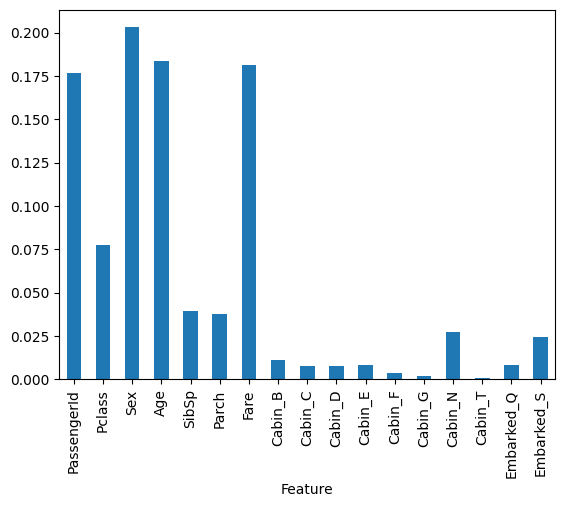

In [11]:
# Variable Importance Plot
importance_values = train_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_values})
imp_plot = importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
imp_plot.plot()
plt.show()

In [14]:
# Apply on test set (private data)
test_predictions = train_model.predict(private_data.drop(columns=['Survived'])).astype(int)
print(test_predictions)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 1 0 0 0]


In [15]:
# Write the test predictions into the private data df into the column 'label'
private_data ['Survived'] = test_predictions

# Keep only the 'ID' and 'label' columns
result = private_data[['PassengerId', 'Survived']]

# Save the result to a CSV file
result.to_csv('prediction2.csv', index=False)